## Load Images

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from data import Images_load

In [2]:
train, validation, test = Images_load.load_data()

Data has apparently already been downloaded and unpacked.


  2%|▏         | 65/4006 [00:00<00:06, 648.32it/s]

Data has apparently already been downloaded and unpacked.


100%|██████████| 4192/4192 [00:06<00:00, 605.41it/s]


In [4]:
features, labels = train.features, train.labels
featuresV, labelsV = validation.features, validation.labels
featuresT, labelsT = test.features, test.labels

## Prepare Data

In [4]:
import numpy as np

In [7]:
x_train = np.stack(features)
x_val = np.stack(featuresV)
x_test = np.stack(featuresT)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print (labels.shape)

(4611, 224, 224, 3)
(2050, 224, 224, 3)
(1538, 224, 224, 3)
(4611, 2)


In [32]:
def count_labels(labels):
    s=0
    for i in range(len (labels)):
        if labels[i][0]== 0 :
            s+=1
    return(s)

In [33]:
print(count_labels(labels),len(labels)-count_labels(labels))
print(count_labels(labelsV),len(labelsV)-count_labels(labelsV))
print(count_labels(labelsT),len(labelsT)-count_labels(labelsT))


2350 2261
793 745
1049 1001


In [18]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

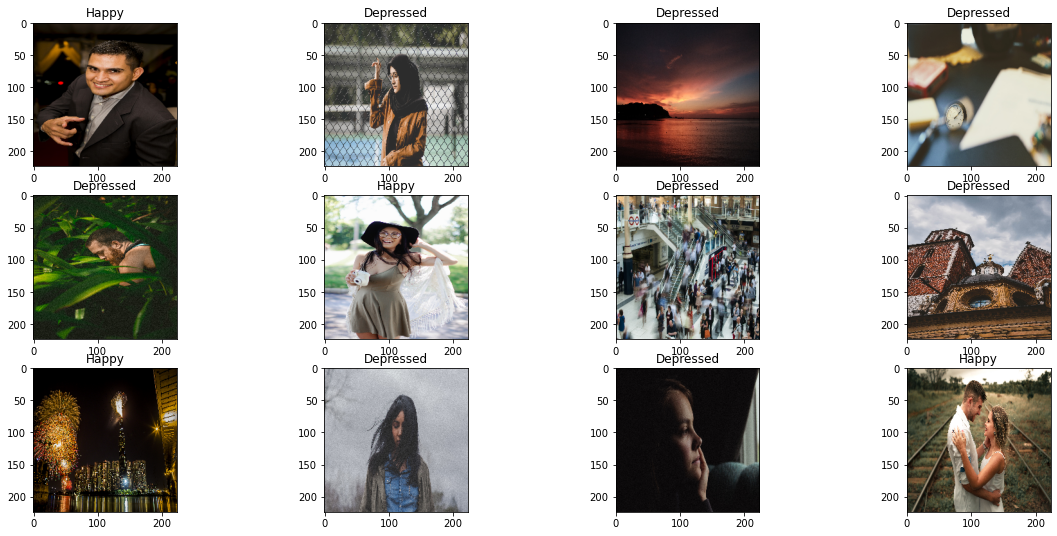

In [25]:
def display_samples(features,labels, columns=4, rows=3):
    fig=plt.figure(figsize=(5*columns, 3*rows))

    for i in range(columns*rows):
        if labels[i][0]== 0 :
            label="Happy"
        else:
            label="Depressed"
        image_id = label
        img = Image.fromarray(features[i], 'RGB')
        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        plt.imshow(img)

display_samples(x_train,labels)

# Simple Deep CNN:

### Example on Cifar10

In [38]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [44]:

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [45]:

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])




In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [10]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)
## (8 vCPUs, 32 GB memory)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 112s 2ms/step - loss: 1.7486 - accuracy: 0.3585 - val_loss: 1.5026 - val_accuracy: 0.4551
Epoch 2/10
50000/50000 [==============================] - 110s 2ms/step - loss: 1.4730 - accuracy: 0.4624 - val_loss: 1.4005 - val_accuracy: 0.4918
Epoch 3/10
50000/50000 [==============================] - 112s 2ms/step - loss: 1.3489 - accuracy: 0.5166 - val_loss: 1.2504 - val_accuracy: 0.5587
Epoch 4/10
50000/50000 [==============================] - 117s 2ms/step - loss: 1.2590 - accuracy: 0.5526 - val_loss: 1.1806 - val_accuracy: 0.5778
Epoch 5/10
50000/50000 [==============================] - 125s 3ms/step - loss: 1.1801 - accuracy: 0.5846 - val_loss: 1.0812 - val_accuracy: 0.6166
Epoch 6/10
50000/50000 [==============================] - 111s 2ms/step - loss: 1.1143 - accuracy: 0.6083 - val_loss: 1.0684 - val_accuracy: 0.6228
Epoch 7/10
50000/50000 [==============================] - 115s

# Unsplas and pexels data: (size 224 * 224)

In [4]:
from models.Image_classifier import Deep_CNN

Using TensorFlow backend.


In [5]:
%%time 
#on a  (8 vCPUs, 32 GB memory)
CM,CR=Deep_CNN.model(train, validation, test)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 4611 samples, validate on 1538 samples


Epoch 1/10
 - 248s - loss: 1.0706 - accuracy: 0.5841 - val_loss: 0.6542 - val_accuracy: 0.6521

Epoch 00001: val_accuracy improved from -inf to 0.65215, saving model to CNNDeepmodel.01-0.65.h5

Epoch 2/10
 - 247s - loss: 0.6440 - accuracy: 0.6386 - val_loss: 0.6491 - val_accuracy: 0.6268

Epoch 00002: val_accuracy did not improve from 0.65215
Epoch 3/10
 - 248s - loss: 0.6219 - accuracy: 0.6583 - val_loss: 0.6092 - val_accuracy: 0.6778

Epoch 00003: val_accuracy improved from 0.65215 to 0.67783, saving model to CNNDeepmodel.03-0.61.h5
Epoch 4/10
 - 244s - loss: 0.6127 - accuracy: 0.6795 - val_loss: 0.6065 - val_accuracy: 0.6684

Epoch 00004: val_accuracy did not improve from 0.67783
Epoch 5/10
 - 244s - loss: 0.6045 - accuracy: 0.6906 - val_loss: 0.5950 - val_acc

In [7]:
print('Confusion Matrix')
print(CM)
print('Classification Report')
print(CR)

Confusion Matrix
[[604 397]
 [201 848]]
Classification Report
               precision    recall  f1-score   support

    Depressed       0.75      0.60      0.67      1001
Not depressed       0.68      0.81      0.74      1049

     accuracy                           0.71      2050
    macro avg       0.72      0.71      0.70      2050
 weighted avg       0.71      0.71      0.70      2050



In [1]:
%load_ext tensorboard
%tensorboard --logdir logs/Images

Reusing TensorBoard on port 6006 (pid 5661), started 2:42:27 ago. (Use '!kill 5661' to kill it.)